<a href="https://colab.research.google.com/github/ayoub4145/Cost-Medical-predictions/blob/main/Cost_Medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('insurance.csv')

#comprendre les données
print(df.head())
print(df.info())
print(df.describe())  # Voir min, max, moyenne des valeurs cibles
#pas de valeurs manquantes



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [6]:
df.shape

(1338, 7)

# Détection des valeurs aberrantes

* Visuellement

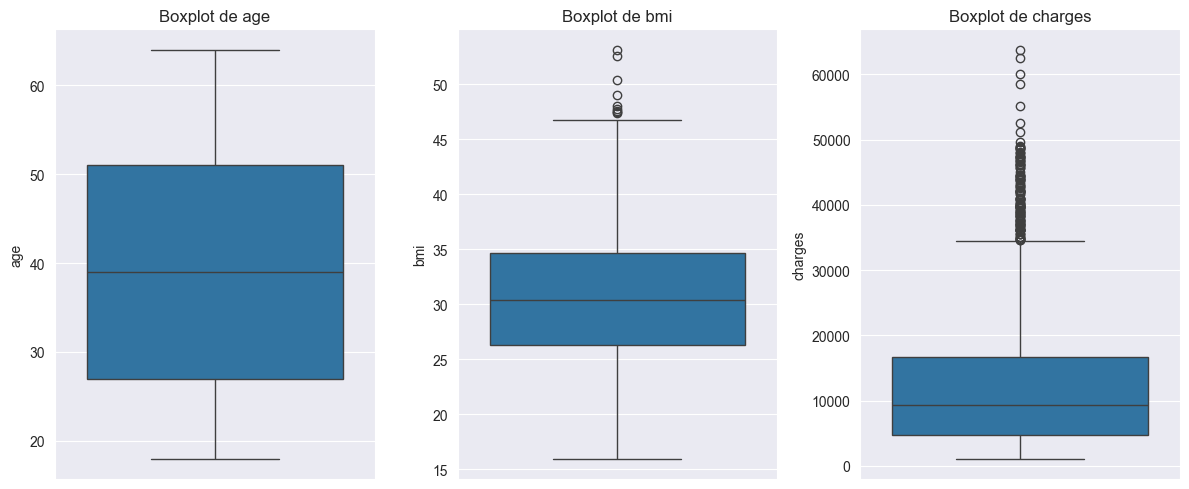

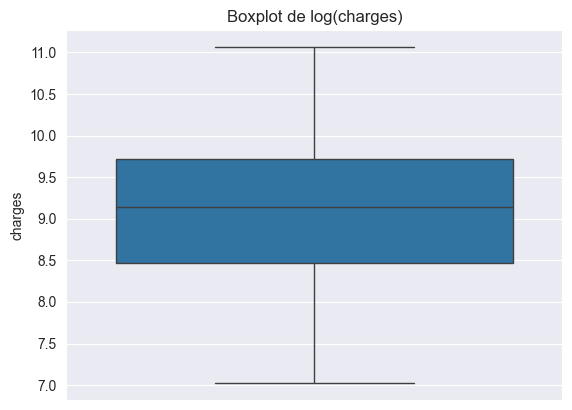

In [16]:
# Sélectionner les colonnes numériques
colonnes_num = ["age","bmi","charges"]
#visualiser les valeurs aberrantes
plt.figure(figsize=(12, 5))
for i, col in enumerate(colonnes_num):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

#charges a des valeurs très élevées qui faussaient la détection des outliers.
#En appliquant log(charges), on réduit l’écart entre les valeurs extrêmes et la médiane,
# rendant les données plus symétriques et faciles à analyser.
df['charges']=np.log1p(df['charges'])
sns.boxplot(y=df["charges"])
plt.title("Boxplot de log(charges)")
plt.show()
#on a des valeurs aberrantes dans bmi et charges, on doit les standariser

# Détection des valeurs aberrantes en utilisant z-score

In [17]:
def detect_outliers(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)

  return outliers

In [18]:
print(f"La listes des outliers dans : charges{detect_outliers(df['charges'])}")
print(f"La listes des outliers dans : bmi{detect_outliers(df['bmi'])}")

La listes des outliers dans : charges[51194.55914, 63770.42801, 58571.07448, 55135.40209, 52590.82939, 60021.39897, 62592.87309]
La listes des outliers dans : bmi[49.06, 50.38, 52.58, 53.13]


In [ ]:
# Standarisation des valeurs aberrantes et les mettres sous la même echelle

In [21]:
#mettre toutes les variables sur la meme echelle (moyenne=0, ecart-type=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["age","bmi","charges"]]=scaler.fit_transform(df[["age","bmi","charges"]])
print(df.head())
print(df.describe())


        age     sex       bmi  children smoker     region   charges
0 -1.438764  female -0.453320         0    yes  southwest  0.298584
1 -1.509965    male  0.509621         1     no  southeast -0.953689
2 -0.797954    male  0.383307         3     no  southeast -0.728675
3 -0.441948    male -1.305531         0     no  northwest  0.719843
4 -0.513149    male -0.292556         0     no  northwest -0.776802
                age           bmi     children       charges
count  1.338000e+03  1.338000e+03  1338.000000  1.338000e+03
mean  -1.805565e-16 -2.124194e-16     1.094918 -8.098488e-17
std    1.000374e+00  1.000374e+00     1.205493  1.000374e+00
min   -1.509965e+00 -2.412011e+00     0.000000 -1.003557e+00
25%   -8.691547e-01 -7.164063e-01     0.000000 -7.046504e-01
50%   -1.474046e-02 -4.320880e-02     1.000000 -3.212089e-01
75%    8.396738e-01  6.611572e-01     2.000000  2.783441e-01
max    1.765289e+00  3.685522e+00     5.000000  4.171663e+00



# Analyse des relations entre les variables


pie chart: relation entre charges et regions

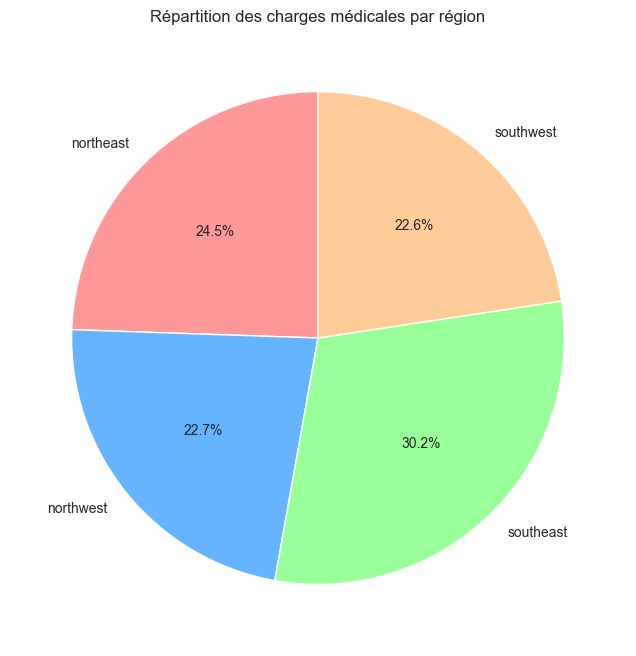

In [37]:
# Somme des charges par région
charges_par_region = df.groupby("region")["charges"].sum()
# Création du pie chart
plt.figure(figsize=(8, 8))  # Taille du graphique
plt.pie(charges_par_region, labels=charges_par_region.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Répartition des charges médicales par région")

plt.show()


encodage

In [22]:
#on doit en premier lieu convertir les colonnes objet en numérique
# Encodage binaire pour sex et smoker
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Encodage One-Hot pour region
df = pd.get_dummies(df, columns=['region'], drop_first=True)
#drop_first=true pour éviter la multicolinéarité

matrice de corrélation

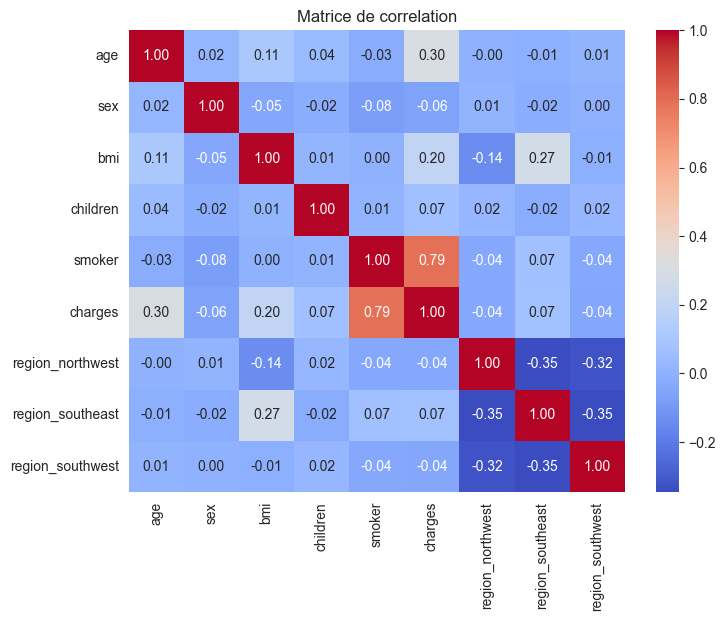

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de correlation")
plt.show()

#on remarque que les variables qui sont fortement corrélé avec log_charges sont age et smoker
#ce qui n'ont presque pas d'influence sont sex et region
#une influence modérée pour bmi


Relation entre BMI et Charges médicales

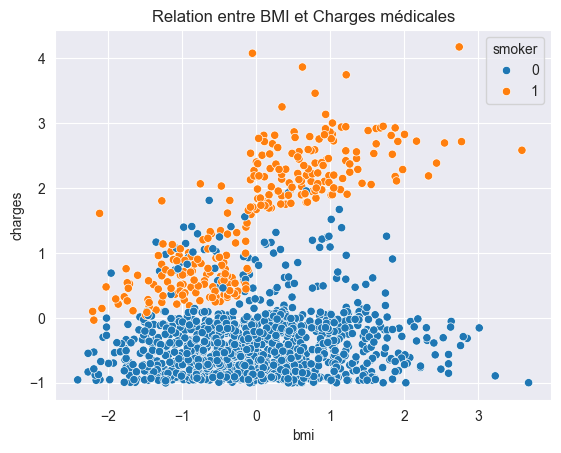

In [27]:
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["smoker"])
plt.title("Relation entre BMI et Charges médicales")
plt.show()
#la relation entre bmi et charges n'est pas linéaire, pas de direct influence
#les fumeurs ont des couts médicaxux tres eleves que les non fumeurs

Impact du tabagisme sur les charges médicaux

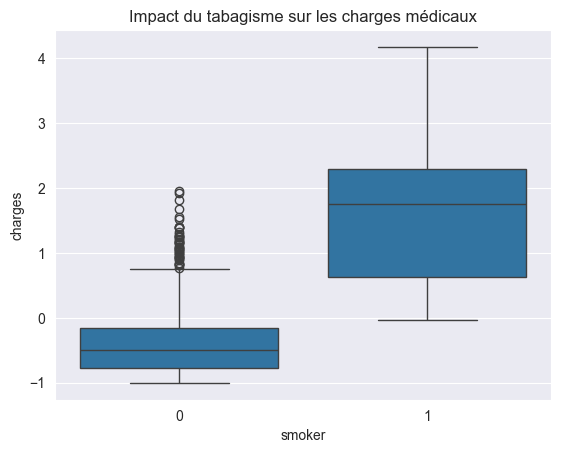

In [28]:
sns.boxplot(x=df["smoker"],y=df["charges"])
plt.title("Impact du tabagisme sur les charges médicaux")
plt.show()
#on remarque un écart significatif entre les fumeurs et non fumeurs en termes des couts
#difference clairement visible sur la boite a moustache(boxplot)

relation entre age et charges medicales

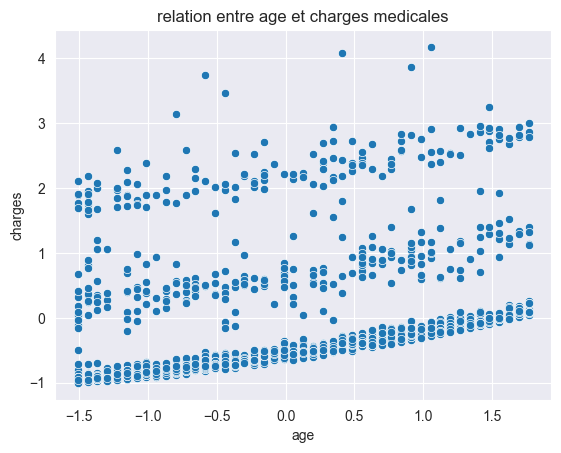

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [33]:
sns.scatterplot(x=df["age"], y=df["charges"])
plt.title("relation entre age et charges medicales")
plt.show()
#pour l'age on a une relation modérée mais significative, puisque la plupart des points ont une relation linéaire avec les charges

df.columns


# Entraînement des modèles

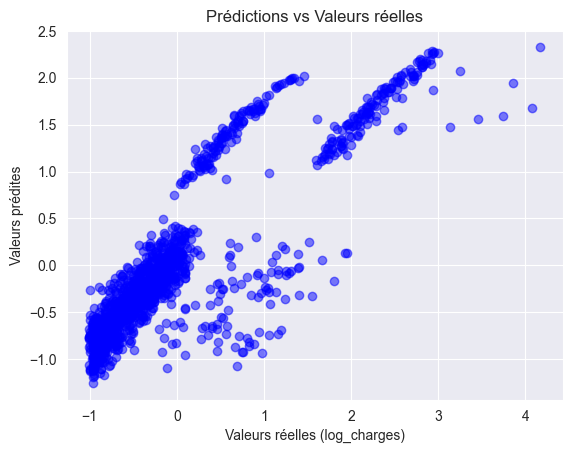

MSE = 0.25252284118804863
RMSE = 0.5025165083736539
R2 = 0.7474771588119513


In [30]:
#regression linéaire
from sklearn.linear_model import LinearRegression

X=df[["age","bmi","smoker"]]
Y=df["charges"]

model1 = LinearRegression()
model1.fit(X,Y)

#prediction
y_pred = model1.predict(X)

#tracage de la courbe
plt.scatter(Y, y_pred, color="blue", alpha=0.5)
plt.xlabel("Valeurs réelles (log_charges)")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

#calcul des erreurs
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y,y_pred)

print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"R2 = {r2}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training, 20% for testing
model1=DecisionTreeRegressor(max_depth=4, random_state=42)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("-------------DecisionTreeRegressor-----------------")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2}")

ValueError: could not convert string to float: 'female'

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

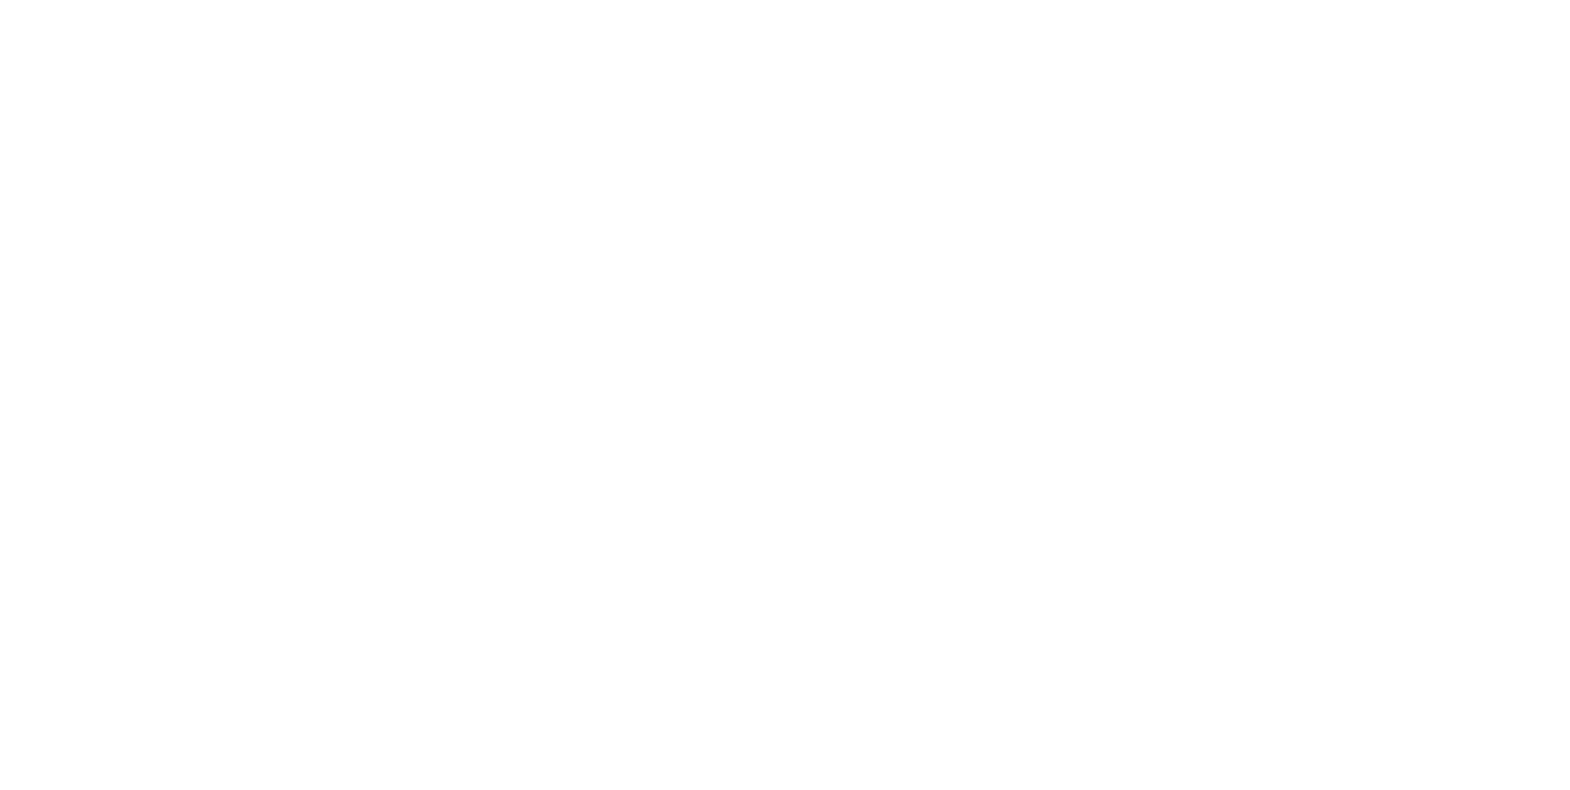

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualizing decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()
